In [1]:
from astropy.io import fits
import subprocess
import copy

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Part I: Orienting yourself to the dataset.

Get to know the data: Display the list of available files. Display a header and explore the keywords and their values. This time, all included files will be used. Note 1: when reading in these data using the astropy fits package, you may need to specify the keyword ignore_missing_end=True, or astropy will crash. It may still throw a lot of warnings, but these can be ignored if there are no errors. Note 2: The spectrum will be oriented up-down by default. Please rotate all images as you read them in (e.g. using numpy's rot90() function), so that the spectra run left-right along the detector. This notebook is written assuming that the files have been rotated so that the spectra run left.

In [2]:
import os

data_dir = "Ay107/"

fits_files = os.listdir(data_dir)
print(fits_files)

['.DS_Store', 'nov05s0002.fits', 'nov05s0003.fits', 'nov05s0004.fits', 'nov05s0005.fits', 'nov05s0006.fits', 'nov05s0007.fits', 'nov05s0016.fits', 'nov05s0017.fits', 'nov05s0038.fits', 'nov05s0039.fits']


In [3]:
hdul1 = fits.open(name=data_dir+"nov05s0017.fits", ignore_missing_end=True)

In [4]:
hdul1[0].header

SIMPLE  =                    T / Tape is in Fits format                         
BITPIX  =                   32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Number of pixels in axis 1                     
NAXIS2  =                 1024 / Number of pixels in axis 2                     
EXTEND  =                    T                                                  
BSCALE  =              1.00000 / Scaling factor                                 
BZERO   =              0.00000 / Scaling zero-point                             
TELESCOP= 'Keck II           ' / Telescope                                      
OBSERVER= 'Imke, Hammel, de K' / Observer                                       
OBJECT  = ' HD31033          ' / Object name                                    
COMMENT = 'Obs #1, Exp 2.    ' / Comment                                        
ROOTNAME= 'nov05s           

# Q1: Print out a log table in-line:
For each file, the table should include: The file name, the UT time, the target RA and DEC, the target name, the object name, comment entry, the airmass, the filter, and the exposure time. 
Make sure your table has a title on every column, including units when relevant.

In [5]:
import pandas as pd

FILENAME_col=[]
RA_col=[]
DEC_col=[]
UTC_col=[]
AIRMASS_col=[]
FILTERNAME_col=[]
TARGNAME_col=[]
OBJECT_col=[]
EXPOSURE_col=[]
COMMENT_col=[]
FLAT_col=[]

for fits_file in fits_files:
    if (fits_file[-5:]==".fits"):
          
        hdu=fits.open(name=data_dir+fits_file, ignore_missing_end=True)

        FILENAME_col.append(hdu[0].header['FILENAME'])
        RA_col.append(hdu[0].header['RA'])
        DEC_col.append(hdu[0].header['DEC'])
        UTC_col.append(hdu[0].header['UTC'])
        AIRMASS_col.append(hdu[0].header['AIRMASS'])
        FILTERNAME_col.append(hdu[0].header['FILNAME'])
        TARGNAME_col.append(hdu[0].header['TARGNAME'])
        OBJECT_col.append(hdu[0].header['OBJECT'])
        EXPOSURE_col.append(hdu[0].header['ITIME']*hdu[0].header['COADDS'])
        COMMENT_col.append(hdu[0].header['COMMENT'])
        FLAT_col.append(hdu[0].header['FLAT'])

log_table = pd.DataFrame(list(zip(FILENAME_col,RA_col,DEC_col,UTC_col,AIRMASS_col,FILTERNAME_col,TARGNAME_col,OBJECT_col,EXPOSURE_col,COMMENT_col,FLAT_col)),columns = ['File Name', 'RA (deg)', 'Dec (deg)', 'UT', 'Airmass', 'Filter Name', 'Target Name', 'Object Name', 'Total Exposure Time (s)', 'Comment', 'Flat']);

log_table

,File Name,RA (deg),Dec (deg),UT,Airmass,Filter Name,Target Name,Object Name,Total Exposure Time (s),Comment,Flat
0,nov05s0002.fits,#### Error ###,#### Error ###,#### Error ###,#### Error ###,NIRSPEC-6,#### Error ###,,0.25,[= 'flat lamp off ' / Comment],0
1,nov05s0003.fits,#### Error ###,#### Error ###,#### Error ###,#### Error ###,NIRSPEC-6,#### Error ###,,0.25,[= 'flat field ' / Comment],1
2,nov05s0004.fits,#### Error ###,#### Error ###,#### Error ###,#### Error ###,NIRSPEC-6,#### Error ###,,2.50,[= 'NeArXeKr ' / Comment],0
3,nov05s0005.fits,#### Error ###,#### Error ###,#### Error ###,#### Error ###,NIRSPEC-6,#### Error ###,,2.50,[= 'NeArXeKr ' / Comment],0
4,nov05s0006.fits,#### Error ###,#### Error ###,#### Error ###,#### Error ###,NIRSPEC-6,#### Error ###,,0.25,[= 'flat lamp off ' / Comment],0
5,nov05s0007.fits,#### Error ###,#### Error ###,#### Error ###,#### Error ###,NIRSPEC-6,#### Error ###,,0.25,[= 'flat field ' / Comment],1
6,nov05s0016.fits,73.40295,25.36443,10:47:05.29,1.07232,NIRSPEC-6,HD31033,HD31033,10.00,"[= 'Obs #1, Exp 1. ' / Comment]",0
7,nov05s0017.fits,73.40114,25.36826,10:47:40.94,1.07136,NIRSPEC-6,HD31033,HD31033,10.00,"[= 'Obs #1, Exp 2. ' / Comment]",0
8,nov05s0038.fits,73.30626,21.71514,11:39:29.30,1.01129,NIRSPEC-6,Io 11:00,Io,30.00,"[= 'Obs #1, Exp 1. ' / Comment]",0
9,nov05s0039.fits,73.30523,21.71919,11:40:26.65,1.01072,NIRSPEC-6,Io 11:00,Io,30.00,"[= 'Obs #1, Exp 2. ' / Comment]",0


# Part II: Flat Field and Spatial Rectification

Make a flat field by taking each "lamp on" flat field and subtracting the neighboring "lamp off" flat field, then averaging the two resulting flats together. Normalizing this flat field is a little tricker because you only want to normalize the illuminated region, which is not rectangular. There are many ways to do this. The way this notebook will describe is to do the spatial rectification first (i.e. turning the illuminated band into a rectangle), and then to apply the rectified flat-field (after cropping out the non-illuminated region) to the rectified and cropped images. An alternative approach that you're welcome to use it to divide out the flats before rectifying, but you will need to make sure to normalize it using only the illuminated region.

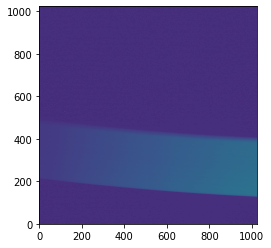

In [6]:
hdul_flaton1 = fits.open(name=data_dir+"nov05s0003.fits", ignore_missing_end=True)
hdul_flatoff1 = fits.open(name=data_dir+"nov05s0002.fits", ignore_missing_end=True)

hdul_flaton2 = fits.open(name=data_dir+"nov05s0007.fits", ignore_missing_end=True)
hdul_flatoff2 = fits.open(name=data_dir+"nov05s0006.fits", ignore_missing_end=True)

flat1 = np.rot90(np.array(hdul_flaton1[0].data,dtype='float'))-np.rot90(np.array(hdul_flatoff1[0].data,dtype='float'))
flat2 = np.rot90(np.array(hdul_flaton2[0].data,dtype='float'))-np.rot90(np.array(hdul_flatoff2[0].data,dtype='float'))

plt.imshow(flat1,origin='lower')

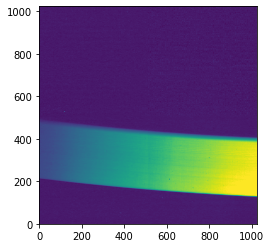

In [7]:
plt.close()
flat=0.5*(flat1+flat2)
plt.imshow(flat,origin='lower',vmin=np.percentile(flat,1),vmax=np.percentile(flat,99))

Use the two star images to do the spatial rectification. First, subtract the second star image from the first and display the result. Then, determine the y-coordinate of the star at every point along its spectrum. The curve described by that sequence of coordinates is known as the "trace". Draw the trace on top of the images to confirm that it is in the right place.

In [8]:
hdul_star1_1 = fits.open(name=data_dir+"nov05s0016.fits", ignore_missing_end=True)
hdul_star1_2 = fits.open(name=data_dir+"nov05s0017.fits", ignore_missing_end=True)

star1 = np.rot90(np.array(hdul_star1_1[0].data,dtype='float'))-np.rot90(np.array(hdul_star1_2[0].data,dtype='float'))

hdul_star2_1 = fits.open(name=data_dir+"nov05s0038.fits", ignore_missing_end=True)
hdul_star2_2 = fits.open(name=data_dir+"nov05s0039.fits", ignore_missing_end=True)

star2 = np.rot90(np.array(hdul_star2_1[0].data,dtype='float'))-np.rot90(np.array(hdul_star2_2[0].data,dtype='float'))

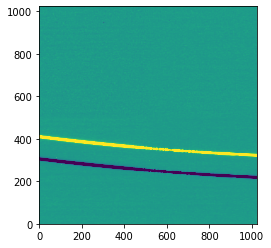

In [9]:
plt.close()
plt.imshow(star1,origin='lower',vmin=np.percentile(star1,1),vmax=np.percentile(star1,99))

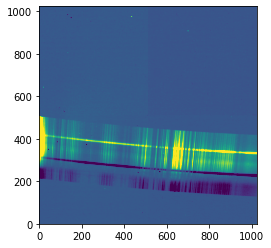

In [10]:
plt.close()
plt.imshow(star2,origin='lower',vmin=np.percentile(star2,1),vmax=np.percentile(star2,99))

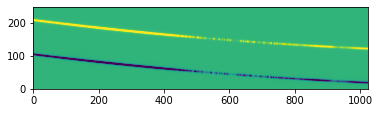

In [11]:
plt.close()
plt.imshow(star1[200:450,:],origin='lower',vmin=np.percentile(star1[200:450,:],1),vmax=np.percentile(star1[200:450,:],99))

In [12]:
def findTraces(im):
    
    upper_trace = np.zeros(im.shape[1])
    lower_trace = np.zeros(im.shape[1])

    for i in range(0,im.shape[1]):
        upper_trace[i]=np.argmax(im[:,i])
        lower_trace[i]=np.argmin(im[:,i])
    
    return upper_trace,lower_trace

In [13]:
upper_trace_star1,lower_trace_star1=findTraces(star1[200:450,:])
upper_trace_star1+=200
lower_trace_star1+=200

upper_trace_star2,lower_trace_star2=findTraces(star2[200:450,:])
upper_trace_star2+=200
lower_trace_star2+=200

In [14]:
def outlier_smoother(x, m=1.5, win=75):
    ''' finds outliers in x, points > m*mdev(x) [mdev:median deviation] 
    and replaces them with the median of win points around them '''
    x_corr = np.copy(x)
    d = np.abs(x - np.median(x))
    mdev = np.median(d)
    idxs_outliers = np.nonzero(d > m*mdev)[0]
    for i in idxs_outliers:
        if i-win < 0:
            x_corr[i] = np.median(np.append(x[0:i], x[i+1:i+win+1]))
        elif i+win+1 > len(x):
            x_corr[i] = np.median(np.append(x[i-win:i], x[i+1:len(x)]))
        else:
            x_corr[i] = np.median(np.append(x[i-win:i], x[i+1:i+win+1]))
    
    return x_corr

In [15]:
upper_trace_star1=outlier_smoother(outlier_smoother(upper_trace_star1))
lower_trace_star1=outlier_smoother(outlier_smoother(lower_trace_star1))

upper_trace_star2=outlier_smoother(outlier_smoother(upper_trace_star2))
lower_trace_star2=outlier_smoother(outlier_smoother(lower_trace_star2))

# Q2a. Display the stellar pair difference image with the trace for both the positive and negative spectrum drawn on it

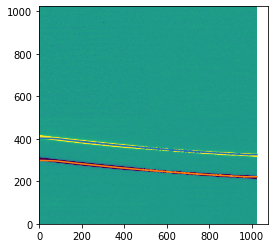

In [16]:
plt.close()
plt.imshow(star1,origin='lower',vmin=np.percentile(star1,1),vmax=np.percentile(star1,99))
plt.plot(np.linspace(1,star1.shape[1],num=star1.shape[1],endpoint=True,dtype=int),upper_trace_star1)
plt.plot(np.linspace(1,star1.shape[1],num=star1.shape[1],endpoint=True,dtype=int),lower_trace_star1)

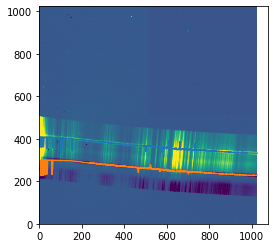

In [17]:
plt.close()
plt.imshow(star2,origin='lower',vmin=np.percentile(star2,1),vmax=np.percentile(star2,99))
plt.plot(np.linspace(1,star2.shape[1],num=star2.shape[1],endpoint=True,dtype=int),upper_trace_star2)
plt.plot(np.linspace(1,star2.shape[1],num=star2.shape[1],endpoint=True,dtype=int),lower_trace_star2)

These y-coordinates you've calculated for each trace represent the offset of each column that needs to be applied to straighten out the spectrum. Average together the two traces for the positive and negative spectra. Then flatten your star pair image by offsetting each column by the amount of the trace.

# Q2b: Display the rectified star spectrum pair, cropping down to the region of the detector just in the vicinity of the star. The star spectra should lie straight. 

In [18]:
def straighten_spectrum(im, trace):
    
    new_im = np.array([np.roll(im[:,0],im.shape[0]//2-1*trace[0])])
    
    for i in range(1,im.shape[1]):
        col=im[:,i]
        new_col=np.array([np.roll(col,im.shape[0]//2-1*trace[i])])
        
        new_im = np.append(new_im,new_col,axis=0)
        
    return new_im.T

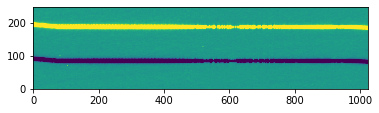

In [19]:
plt.close()
trace_star1=(0.5*upper_trace_star1+0.5*lower_trace_star1).astype(int)
straightened_star1 = straighten_spectrum(star1,trace_star1)

plt.imshow(straightened_star1[375:625,:],origin='lower',vmin=np.percentile(star1,1),vmax=np.percentile(star1,99))

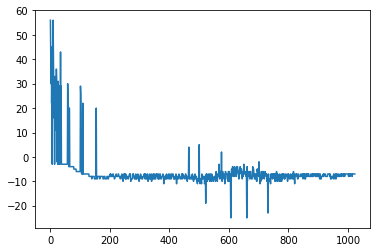

In [20]:
plt.close()
trace_star2 = (0.5*upper_trace_star2+0.5*lower_trace_star2).astype(int)

plt.plot(trace_star1-trace_star2) #Notice that `trace_star1` has the same curvature as `trace_star2` but has less outliers

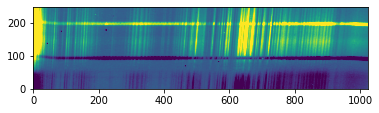

In [21]:
plt.close()
straightened_star2 = straighten_spectrum(star2,trace_star1) #using star 1 trace as it is more robust for offset calibration

plt.imshow(straightened_star2[375:625,:],origin='lower',vmin=np.percentile(star2,1),vmax=np.percentile(star2,99))

Now, let's revisit the flat field to create a rectified flat that will be applied to your rectified spectral images. Apply the offsets and crop the flat in exactly the same way you did for the star pair image. Make sure that the new cropped size excludes any of the un-illuminated pixels, which will be visible in the rectified flat if they're not cropped. Finally, divide the rectified, cropped flat field by its median value to normalize it to 1. This is your final flat field that will be applied to the data.

# Q2c. Plot your rectified, cropped, and normalized flat field

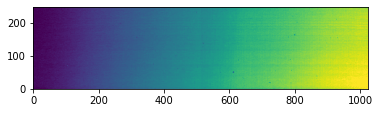

In [22]:
plt.close()
straightened_flat = straighten_spectrum(flat,trace_star1) #using star 1 trace as it is more robust for offset calibration

lower_crop=375
upper_crop=625

cropped_straightened_flat=straightened_flat[lower_crop:upper_crop,:]
final_flat=cropped_straightened_flat/np.median(cropped_straightened_flat)

plt.imshow(final_flat,origin='lower',vmin=np.percentile(final_flat,1),vmax=np.percentile(final_flat,99))

## Q2d: Divide your rectified star pair image by the normalized flat field and plot the star pair image before and after the flat correction.

In [23]:
cropped_straightened_star1 = straightened_star1[lower_crop:upper_crop]

straightened_star1_flat = cropped_straightened_star1/final_flat #divide or subtract?

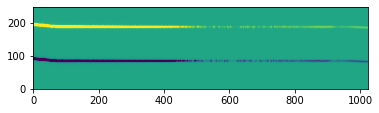

In [24]:
plt.close()
plt.imshow(straightened_star1_flat,origin='lower',vmin=np.percentile(straightened_star1_flat,1),vmax=np.percentile(straightened_star1_flat,99))

Determine the center y-coordinate of each spectrum. Then, extract the spectrum as follows. For each x-coordinate (wavelength axis), add up pixels within a y-distance "a" of the center of the spectrum. Then, calculate the background for every column by averaging the pixels that are between a distance "b" and a distance "c" of the center of the spectrum. These are the equivalent a/b/c from the imaging aperture photometry, we're just working in one dimension instead of two, and calculating the background separately at every wavelength.

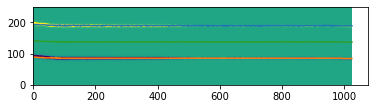

In [25]:
plt.close()
# Finding and plotting the center Y coordinate
y_upper_star1,y_lower_star1=findTraces(straightened_star1_flat)

y_upper_star1=outlier_smoother(y_upper_star1)
y_lower_star1=outlier_smoother(y_lower_star1)

y_center_star1=0.5*y_upper_star1+0.5*y_lower_star1

plt.imshow(straightened_star1_flat,origin='lower',vmin=np.percentile(straightened_star1_flat,1),vmax=np.percentile(straightened_star1_flat,99))

plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_upper_star1)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_lower_star1)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_center_star1)

In [26]:
a = 7 #183
b = 15 #175
c = 12 #178

signal_arr_upper_star1 = np.zeros(straightened_star1_flat.shape[1])
background_arr_upper_star1 = np.zeros(straightened_star1_flat.shape[1])

for i in range(0,straightened_star1_flat.shape[1]):
    for j in range(-1*a,a+1):
        signal_arr_upper_star1[i] += straightened_star1_flat[y_upper_star1.astype(int)[i]+j][i]
    for j in range(c,b+1):
        background_arr_upper_star1[i] += straightened_star1_flat[y_upper_star1.astype(int)[i]+j][i]+straightened_star1_flat[y_upper_star1.astype(int)[i]-j][i]

background_arr_upper_star1 = background_arr_upper_star1/(c-b+1)

In [27]:
signal_arr_lower_star1 = np.zeros(straightened_star1_flat.shape[1])
background_arr_lower_star1 = np.zeros(straightened_star1_flat.shape[1])

for i in range(0,straightened_star1_flat.shape[1]):
    for j in range(-1*a,a+1):
        signal_arr_lower_star1[i] += straightened_star1_flat[y_lower_star1.astype(int)[i]+j][i]
    for j in range(c,b+1):
        background_arr_lower_star1[i] += straightened_star1_flat[y_lower_star1.astype(int)[i]+j][i]+straightened_star1_flat[y_lower_star1.astype(int)[i]-j][i]

background_arr_lower_star1 = background_arr_lower_star1/(c-b+1)

# Q2e. Plot the rectified stellar spectrum image with the apertures used for the extraction indicated. i.e. plot as horizontal lines on the rectified star pair image: coord+a, coord-a, coord+b, coord-b, coord+c, and coord-c for each of the two spectra, where "coord" is the y-coordinate at the center of that spectrum

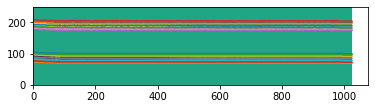

In [28]:
plt.close()
plt.imshow(straightened_star1_flat,origin='lower',vmin=np.percentile(straightened_star1_flat,1),vmax=np.percentile(straightened_star1_flat,99))

plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_upper_star1)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_upper_star1+a)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_upper_star1-a)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_upper_star1+b)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_upper_star1-b)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_upper_star1+c)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_upper_star1-c)

plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_lower_star1)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_lower_star1+a)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_lower_star1-a)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_lower_star1+b)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_lower_star1-b)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_lower_star1+c)
plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),y_lower_star1-c)

In [29]:
spectrum_star1 = 0.5*np.abs(signal_arr_upper_star1-2*a*background_arr_upper_star1)+0.5*np.abs(signal_arr_lower_star1+2*a*background_arr_lower_star1)

Average together the two spectra you extracted, making sure you've subtracted the background and taken the negative of the negative spectrum so that both are positive. Divide by (exposure time x coadds), and label the plot in counts/sec.

# Q2f: Plot the averaged stellar spectrum in counts/sec vs. pixel

Text(0.5, 0, 'pixel')

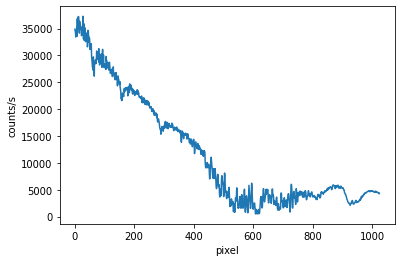

In [30]:
plt.close()
scale_star1=10 #for counts/sec

plt.plot(np.linspace(1,straightened_star1_flat.shape[1],num=straightened_star1_flat.shape[1],endpoint=True,dtype=int),spectrum_star1/scale_star1)
plt.ylabel('counts/s')
plt.xlabel('pixel')

# Q3: Repeat the same procedure as above for the Io pair and plot the Io spectrum in counts/sec vs. pixel

In [31]:
trace_star2=(0.5*upper_trace_star2+0.5*lower_trace_star2).astype(int)
straightened_star2 = straighten_spectrum(star2,trace_star1)

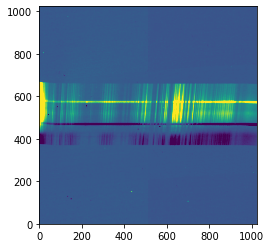

In [32]:
plt.close()
plt.imshow(straightened_star2,origin='lower',vmin=np.percentile(star2,1),vmax=np.percentile(star2,99))

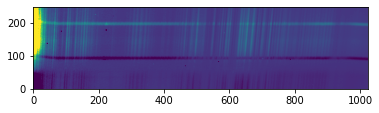

In [33]:
cropped_straightened_star2 = straightened_star2[lower_crop:upper_crop]

straightened_star2_flat = cropped_straightened_star2/final_flat

plt.close()
plt.imshow(straightened_star2_flat,origin='lower',vmin=np.percentile(straightened_star2_flat,1),vmax=np.percentile(straightened_star2_flat,99))

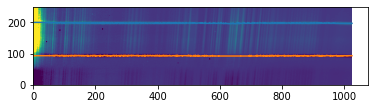

In [34]:
plt.close()
# Finding and plotting the center Y coordinate
y_upper_star2,y_lower_star2=findTraces(straightened_star2_flat)

y_upper_star2=outlier_smoother(y_upper_star2)
y_lower_star2=outlier_smoother(y_lower_star2,win=200)

y_center_star2=0.5*y_upper_star2+0.5*y_lower_star2

plt.imshow(straightened_star2_flat,origin='lower',vmin=np.percentile(straightened_star2_flat,1),vmax=np.percentile(straightened_star2_flat,99))

plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_upper_star2)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_lower_star2)
#plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_center_star2)

In [35]:
a_io = 5 
b_io = 20 
c_io = 37 

signal_arr_upper_star2 = np.zeros(straightened_star2_flat.shape[1])
background_arr_upper_star2 = np.zeros(straightened_star2_flat.shape[1])

for i in range(0,straightened_star2_flat.shape[1]):
    for j in range(-1*a_io,a_io+1):
        signal_arr_upper_star2[i] += straightened_star2_flat[y_upper_star2.astype(int)[i]+j][i]
    for j in range(c_io,b_io+1):
        background_arr_upper_star2[i] += straightened_star2_flat[y_upper_star2.astype(int)[i]+j][i]+straightened_star2_flat[y_upper_star2.astype(int)[i]-j][i]

background_arr_upper_star2 = background_arr_upper_star2/(c_io-b_io+1)

In [36]:
signal_arr_lower_star2 = np.zeros(straightened_star2_flat.shape[1])
background_arr_lower_star2 = np.zeros(straightened_star2_flat.shape[1])

for i in range(0,straightened_star2_flat.shape[1]):
    for j in range(-1*a_io,a_io+1):
        signal_arr_lower_star2[i] += straightened_star2_flat[y_lower_star2.astype(int)[i]+j][i]
    for j in range(c_io,b_io+1):
        background_arr_lower_star2[i] += straightened_star2_flat[y_lower_star2.astype(int)[i]+j][i]+straightened_star2_flat[y_lower_star2.astype(int)[i]-j][i]

background_arr_lower_star2 = background_arr_lower_star2/(c_io-b_io+1)

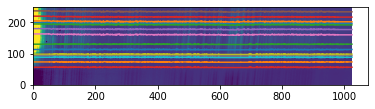

In [37]:
plt.close()
plt.imshow(straightened_star2_flat,origin='lower',vmin=np.percentile(straightened_star2_flat,1),vmax=np.percentile(straightened_star2_flat,99))

plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_upper_star2)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_upper_star2+a_io)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_upper_star2-a_io)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_upper_star2+b_io)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_upper_star2-b_io)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_upper_star2+c_io)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_upper_star2-c_io)

plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_lower_star2)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_lower_star2+a_io)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_lower_star2-a_io)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_lower_star2+b_io)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_lower_star2-b_io)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_lower_star2+c_io)
plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),y_lower_star2-c_io)

In [38]:
spectrum_star2 = 0.5*np.abs(signal_arr_upper_star2-2*a*background_arr_upper_star2)+0.5*np.abs(signal_arr_lower_star2+2*a*background_arr_lower_star2)

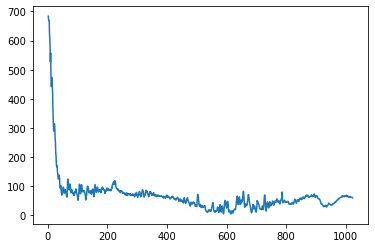

In [39]:
plt.close()
scale_star2=30 #for counts/sec

plt.plot(np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int),spectrum_star2/scale_star2)

# Part III: Wavelength Calibration

Rectify, crop and display an arc lamp image. The lines will likely not be perfectly vertical even after the rectification. In a full data reduction pipeline you would correct for this, but for this tutorial we will ignore it.

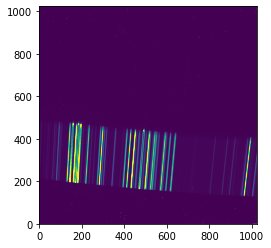

In [40]:
hdu_arclamp_1 = fits.open(name=data_dir+"nov05s0004.fits", ignore_missing_end=True)
hdu_arclamp_2 = fits.open(name=data_dir+"nov05s0005.fits", ignore_missing_end=True)

arclamp_1 = np.rot90(np.array(hdu_arclamp_1[0].data,dtype='float'))
arclamp_2 = np.rot90(np.array(hdu_arclamp_2[0].data,dtype='float'))

plt.close()
plt.imshow(arclamp_1,origin='lower',vmin=np.percentile(arclamp_1,1),vmax=np.percentile(arclamp_1,99))

# Q4a. Display the rectified, flat-fielded, and cropped arc lamp image

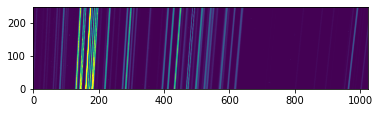

In [41]:
rectified_arclamp1 = straighten_spectrum(arclamp_1,trace_star1)
final_arclamp_1 = rectified_arclamp1[lower_crop:upper_crop,:]/final_flat

plt.close()
plt.imshow(final_arclamp_1,origin='lower',vmin=np.percentile(final_arclamp_1,1),vmax=np.percentile(final_arclamp_1,99))

Plot a 1-D horizontal cut, i.e. a spectrum for a location around the middle of the slit

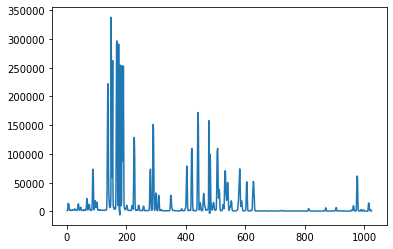

In [42]:
middle_cut_arclamp_1 = final_arclamp_1[100,:]

plt.close()
plt.plot(np.linspace(1,final_arclamp_1.shape[1],num=final_arclamp_1.shape[1],endpoint=True,dtype=int),middle_cut_arclamp_1)

Using this spectrum, you will need to correctly identify at least three of the emission lines to determine the function converting pixel coordinate along the spectrum to wavelength. Below is a list of the wavelengths (in microns) of emission lines from the gasses in the arc lamp image. Not all emission lines in the image will have identifications in this list, and not all identifications will have corresponding lines. To attempt to identify them, consider that the spectrum measured should start close to 1.618 microns (left side if you used the np.rot90 function to rotate) and end close to 2.041 microns. And, pixel value should be close to linearly related to wavelength. This is the trickiest part of reducing spectral data!

In [43]:
# Emission lines from the arc lamp gasses, in microns
lines = np.array([1.64414,1.65247,1.65543,1.710811,1.716663,1.723492,1.733023,1.737748,1.741419,1.74497,1.762139,1.763526,
                  1.777507,1.78288,1.800663,1.804072,1.863024,1.86373,1.870102,1.880273,1.98230,
                  1.99503,1.99712,2.00314,2.00751,2.021539,2.03224,2.042955,2.05741,2.06219,2.063185,
                  2.06528,2.07390,2.08168,2.09918])

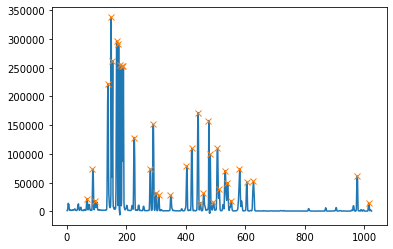

In [44]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(middle_cut_arclamp_1, prominence = 12650)

plt.close()
plt.plot(np.linspace(1,final_arclamp_1.shape[1],num=final_arclamp_1.shape[1],endpoint=True,dtype=int),middle_cut_arclamp_1)
#plt.vlines(1000*lines-1700,ymin=0,ymax=300000, colors='purple', ls='--', lw=0.5)
plt.plot(peaks,middle_cut_arclamp_1[peaks],"x")

In [45]:
len(peaks)==len(lines)

True

In [46]:
# let wavelength = m*x+b

from scipy.stats import linregress

m = linregress(peaks[:-2],lines[:-2])[0] #excluding the last 2 points
b = linregress(peaks[:-2],lines[:-2])[1]

# Q4b. Once you have identified 3 lines, plot the arc spectrum from above again, and indicate the three (or more) lines you're using. Print out the pixel value and wavelength for each.

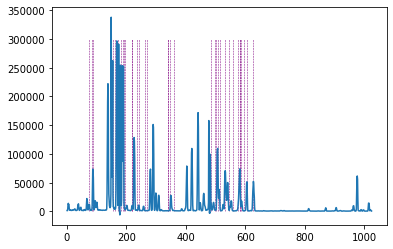

In [47]:
# Instead of eyeballing 3 lines, I choose to fit the list of peaks with the given wavelength list. 
# We can see that the fit is not perfect but the lines are near the peaks

plt.close()
plt.plot(np.linspace(1,final_arclamp_1.shape[1],num=final_arclamp_1.shape[1],endpoint=True,dtype=int),middle_cut_arclamp_1)
plt.vlines((lines-b)/m,ymin=0,ymax=300000, colors='purple', ls='--', lw=0.5)

# Q4c. Make a plot with your line identifications: For each line you identified, plot the pixel value on the x axis and its wavelength on the y axis. If your three points do not lie close to on a line, you've identified something incorrectly. Now, fit a polynomial (degree 1 or 2, but 1 should suffice) to this line. numpy's polyfit function is simple and adequate. That polynomial is your function to convert pixel to wavelength. Add the polynomial to your plot.

0.9820142902478465


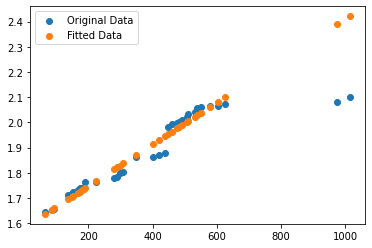

In [48]:
# Checking the relationship between peaks and given wavelength lines

plt.close()
plt.scatter(peaks,lines, label='Original Data')
plt.scatter(peaks,m*peaks+b, label='Fitted Data')
plt.legend()
print(linregress(peaks[:-2],lines[:-2])[2]) # high rvalue

# Q4d: Plot the Io spectrum in counts/sec vs. wavelength.

Text(0.5, 0, 'wavelength (in micron)')

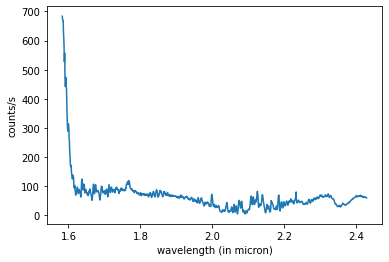

In [49]:
plt.close()
wavelength = m*np.linspace(1,straightened_star2_flat.shape[1],num=straightened_star2_flat.shape[1],endpoint=True,dtype=int)+b
plt.plot(wavelength,spectrum_star2/scale_star2)
plt.ylabel('counts/s')
plt.xlabel('wavelength (in micron)')

# Part IV: Telluric Correction

We will correct the spectrum for atmospheric absorption analogously to the photometry tutorial, but now using an entire spectrum for the calibration star instead of a single value for a given filter. So, you will create a conversion spectrum (instead of conversion value) that can be applied to your data. The conversion spectrum is a stellar model divided by the stellar spectrum in counts/sec, and thus converts the data from counts/sec into whatever physical units the model was in.

Create a stellar model assuming your star is a 9000 K blackbody. We are not going to worry about absolute scaling of the spectrum, or about getting absolute photometry. So, feel free to rescale the model spectrum by a constant to bring it to a different normalization if you like.

In [50]:
def planck(lam,T):
    # Inputs:
    # lam: an array of wavelengths in microns
    # T: temperature in Kelvins
    # Output:
    # Array of flux densities at each wavelength
    lam = lam*1e-6 # convert from microns to meters
    h = 6.626e-34 # m^2 kg/s
    kb = 1.38e-23 # m^2 kg s^-2 K^-1
    c = 3e8 # m/s
    Blam = (2.0*h*c**2./lam**5.)/(np.exp(h*c/(lam*kb*T))-1) # SI units
    return Blam

In [51]:
conversion_spectrum=planck(wavelength,9000)/(spectrum_star1/scale_star1)

# Q5a: Plot the final Io spectrum, in units of Normalized Flux Density vs. Wavelength. Overplot a Planck function that approximates the overall shape of the Io spectrum. Print out the temperature that provided the best fit.

Text(0.5, 0, 'wavelength in micron')

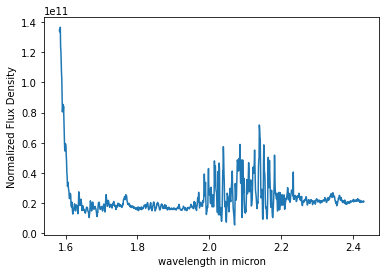

In [52]:
plt.close()

measured_io_spectrum = conversion_spectrum*spectrum_star2/scale_star2
plt.plot(wavelength,measured_io_spectrum)

plt.ylabel('Normalized Flux Density')
plt.xlabel('wavelength in micron')

# Q5b. Finally, plot the Io spectrum minus the best-fit Planck spectrum. There is a Sulfur Monoxide gas emission band in the spectrum. Identify where it is. It may help to look at a transmission spectrum of Earth's atmosphere above Mauna Kea, which will help you identify which of the features in Io's spectrum are actually due to Earth.

In [53]:
from scipy.optimize import curve_fit

io_temp = curve_fit(planck, wavelength, measured_io_spectrum, bounds = (5,280))[0]

io_bestfit_planck = planck(wavelength,io_temp)

print(io_temp)

[142.5]


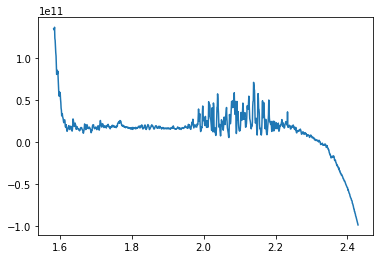

In [54]:
plt.close()
plt.plot(wavelength,measured_io_spectrum-1e17*io_bestfit_planck)

These data are published in de Kleer et al (2019) https://arxiv.org/pdf/1808.03321.pdf, and you can see the resultant spectrum in Figure 7, after a more complex data reduction procedure and after combining a larger volume of spectra pairs.